# Machine Learning issues

## Environment setup

In [3]:
# Install LIME
%pip install lime


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import platform

print(f"Python version: {platform.python_version()}")

import numpy as np
import pandas as pd

print(f"NumPy version: {np.__version__}")

from IPython.display import YouTubeVideo

Python version: 3.11.1
NumPy version: 1.23.5


In [5]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

import sklearn.datasets
import sklearn.ensemble

import lime
import lime.lime_tabular

scikit-learn version: 1.2.2


## Explainability and interpretability

### A growing need

- ML-based systems are more and more used in a wide variety of scenarios:
  - High-stakes decisions (examples: automatic driving, grid monitoring, cyber-warfare...)
  - Direct impact on people's lives (examples: medical diagnosis, loan attribution, judiciary decisions...).
- In some contexts, being able to understand and justify the system's decision is **critical** for its acceptance.

### White boxes models

Some ML models, like this decision tree, are explainable *by design*.

![Decision Tree example](images/dt_iris.png)

### Black boxes models

Most ML models act as *black boxes*. For example, a neural network performs a series of non-linear transformations on its inputs to compute its result. The deeper the network, the less its decision process is intelligible to humans.

![Dog or cat?](images/neural_net.gif)

### Explainability Vs interpretability

These two terms are often used interchangeably in the scientific community.

The following distinction can nonetheless be useful:

- **Interpretability** is about discerning the internal mechanics of a model, e.g. understanding *how*.
- **Explainability** is about justifying the model's decision, e.g. understanding *why*.

### Explanation methods

Explanations can:

- take various forms: textual, visual, symbolic.
- be *global*, i.e. characterise the whole dataset, or *local*, i.e. explain individual classification or regression outcomes.
- be *model-specific*, i.e. capable of explaining only a restricted class of models, or *model-agnostic*, i.e. applicable to an arbitrary model.

### Explanation examples

"This person hasn't be approved for a loan because her financial behavior has been questionable for 10 years".

![Visual explainability example](images/woman_frisbee.png)

### A possible taxonomy

[![XAI taxomony](images/xai_taxomony.png)](https://arxiv.org/abs/2012.01805v1)

### An attribution method: LIME

[LIME](https://github.com/marcotcr/lime) (*Local Interpretable Model-agnostic Explanations*) aims to explain the rationale behind a model’s predictions, in order to help users decide when to trust or not to trust these predictions.

![LIME objective](images/lime1.jpg)

#### How LIME works

LIME trains a local linear approximation of the model's behaviour. The linear coefficients represent the contributions of the features to the prediction.

In the following picture, the linear model (dashed line) is a good approximation in the neighborhood of the explained instance (bright red cross).

[![LIME in action](images/lime.png)](https://github.com/marcotcr/lime)

#### LIME for images (1/2)

When explaining classification results for an image, LIME starts by dividing it into interpretable components (contiguous blocks of pixels).

![Image division into superpixels](images/lime_image.jpg)

#### LIME for images (2/2)

A dataset of "perturbed" instances (images for which some of the interpretable components are grayed) and the corresponding model probabilities is used to train a simple (linear) model. The superpixels with highest positive weights are presented as an explanation.

![LIME process with images](images/lime_image_exp.jpg)

#### LIME in action

In [6]:
# Load the Iris dataset (https://archive.ics.uci.edu/ml/datasets/iris)
iris = sklearn.datasets.load_iris()

# Create train/test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    iris.data, iris.target, test_size=0.20
)

print(f"x_train: {x_train.shape}. y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}. y_test: {y_test.shape}")

x_train: (120, 4). y_train: (120,)
x_test: (30, 4). y_test: (30,)


In [7]:
# Put it into a DataFrame for visualization purposes
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target and class columns to DataFrame
df_iris["target"] = iris.target
df_iris["class"] = iris.target_names[iris.target]

# Show 8 random samples
df_iris.sample(n=8)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
37                 4.9               3.6                1.4               0.1  \
40                 5.0               3.5                1.3               0.3   
42                 4.4               3.2                1.3               0.2   
99                 5.7               2.8                4.1               1.3   
100                6.3               3.3                6.0               2.5   
4                  5.0               3.6                1.4               0.2   
132                6.4               2.8                5.6               2.2   
25                 5.0               3.0                1.6               0.2   

     target       class  
37        0      setosa  
40        0      setosa  
42        0      setosa  
99        1  versicolor  
100       2   virginica  
4         0      setosa  
132       2   virginica  
25        0      setosa

In [8]:
# Train a Random Forest on the dataset
rf_model = sklearn.ensemble.RandomForestClassifier(n_estimators=50)
rf_model.fit(x_train, y_train)

# Compute accuracy on test data
test_acc = sklearn.metrics.accuracy_score(y_test, rf_model.predict(x_test))
print(f"Test accuracy: {test_acc:.5f}")

Test accuracy: 1.00000


In [9]:
# Create the LIME explainer
# Continuous features are discretized into quartiles for more intuitive explanations
explainer = lime.lime_tabular.LimeTabularExplainer(
    x_train,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    discretize_continuous=True,
)

In [10]:
# Select a random test sample
index = np.random.randint(0, x_test.shape[0])
sample = x_test[index]

# Explain this sample
exp = explainer.explain_instance(sample, rf_model.predict_proba, num_features=2, top_labels=1)
exp.show_in_notebook(show_all=False)

In [11]:
exp.as_list(rf_model.predict(x_test)[index])

[('4.15 < petal length (cm) <= 5.10', 0.25533060841472033),
 ('1.30 < petal width (cm) <= 1.80', 0.23365638368850616)]

### Additional resources

- Marcinkevičs, Ričards, and Julia E. Vogt. “Interpretability and Explainability: A Machine Learning Zoo Mini-Tour.” ArXiv:2012.01805 [Cs], December 3, 2020. http://arxiv.org/abs/2012.01805
- Xie, Ning, Gabrielle Ras, Marcel van Gerven, and Derek Doran. “Explainable Deep Learning: A Field Guide for the Uninitiated.” ArXiv:2004.14545 [Cs, Stat], April 29, 2020. http://arxiv.org/abs/2004.14545
- [Explaining Black Box Models and Datasets](https://github.com/EthicalML/awesome-production-machine-learning#explaining-black-box-models-and-datasets)
- [Local Interpretable Model-Agnostic Explanations (LIME): An Introduction](https://www.oreilly.com/content/introduction-to-local-interpretable-model-agnostic-explanations-lime/)

## Bias and fairness

### Definition: bias

Generally speaking, a **bias** is a disproportionate weight in favor of or against an idea, thing or group.

There are many types of bias, including:
- **Cognitive bias**, a repeating or basic misstep in thinking.
- **Conflicts of interest**, when one has intersecting interests (financial, personal, etc.) which could potentially corrupt.
- **Prejudices**, forming an opinion before becoming aware of the relevant facts.
- **Algorithmic bias**, studied below.
  
([Source](https://en.wikipedia.org/wiki/Bias))

### Definition: fairness

**Fairness** is a broad concept potentially refering to justice, equality, solidarity or even sports.

It can be defined as the absence of bias.

([Source](https://en.wikipedia.org/wiki/Fairness))

### Bias and fairness in ML

Like all computer-based disciplines, Machine Learning is concerned with **algorithmic biases**: systematic and repeatable errors in a computer system that create unfair outcomes.

Its specific nature and expanding application in many fields has given rise to new problems and controversies.

Research about fairness in Machine Learning is a relatively recent topic.

([Source](https://en.wikipedia.org/wiki/Algorithmic_bias))

### Semantic understanding (or lack thereof)

A Machine Learning model has **no semantic understanding** of what it’s looking at. It’s just detecting patterns in the sequence of numbers used as input data.

The model might find some wrong patterns, without anyone noticing.

### Biases examples

#### Sheeps everywhere!

[![AI sheeps](images/ai_sheeps_everywhere.jpg)](https://www.aiweirdness.com/do-neural-nets-dream-of-electric-18-03-02/)

#### Resumé screening

Like many large-scaled companies, Amazon tried to build an automated, ML-based resumé screening tool to speed up its recruitment process. Trained on its male-dominated employee base, the tool taught itself that male candidates were preferable to women.

It was scraped before being put into production.

"Fun" fact: gender was not explicitly marked on the resumés. The system was seeing patterns in the sample set of "successful employees" in other things. For example, women might use different words to describe accomplishments, or have played different sports at school.

([Source](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight/amazon-scraps-secret-ai-recruiting-tool-that-showed-bias-against-women-idUSKCN1MK08G))

#### Skin cancer detection

ML systems trained on images taken from people with lighter skin types might not be as accurate for people with darker skin, and vice versa.

The problem could arise because of imbalance in the training set, or because the model should be built differently depending on the skin tone.

([Source](https://www.ncri.org.uk/ai-to-spot-skin-cancer-lacking-pictures-of-darker-skin/))

#### Crime relapse assessment

COMPAS, a tool used by courts in the United States to make pretrial detention and release decisions, was proven to be biased again African Americans.

![COMPAS bias](images/compas_bias.png)

Trained on a dataset of criminal history, the software uses features like prior arrests and friend/family arrests that are problematic, given the differences in controlling and policing between ethnic groups in the US.

([Source](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing))

#### Car insurance rates

Even patterns in the data that are entirely accurate and correct predictors may imply ethical or legal concerns. 

For example, women might tend to be safer drivers. An ML model trained on historical data could easily learn to associate women with lower risk (and lower rates), even through this may be illegal!

### Technical Vs holistic approaches: the LeCun/Gebru Twitter feud

In June 2020, Facebook chief AI scientist Yann LeCun and (then) co-lead of the Google Ethical AI team Timnit Gebru got into a [heated debate on Twitter](https://twitter.com/timnitGebru/status/1274809417653866496) about bias in AI, leading to LeCun leaving Twitter for a while.

LeCun's solution was primarily technical ("ML systems are biased when data is biased"). Gebru argued that social and structural problems, like the lack of diversity in the AI workforce, also contributed to bias.

This argument illustrates the somewhat irreconciliable points of view in the Machine Learning scientific community regarding bias and fairness.

([Source](https://syncedreview.com/2020/06/30/yann-lecun-quits-twitter-amid-acrimonious-exchanges-on-ai-bias/))

### Debunking myths

- Myth #1: "~~AI is maths, so it cannot be biased~~".
- Myth #2: "~~ML is inherently biased~~".
- As often, reality is more nuanced than this black-or-white (no pun intended 😉) scenario.

### Bias management

All in all, ML systems can be both extremely powerful and extremely limited.

Lessening bias could involve the following steps:

1. Methodological rigour in the collection and management of the training data.
1. Technical tools to analyse and diagnose the behavior of the model.
1. Training, education and caution in the deployment of ML in products.

### Methods for fair ML

Methods that target biases in the algorithms fall under three categories.

1. **Pre-processing**: try to transform the data so that the underlying discrimination is removed.
1. **In-processing**: try to modify and change learning algorithms in order to remove discrimination during the training process (for example, changing the objective function or imposing a constraint).
1. **Post-processing**: using side information about the similarity between samples, update the model's results to satisfy the desired fairness constraints ("treat similar individuals similarly").


### Additional resources

- Mehrabi, Ninareh, Fred Morstatter, Nripsuta Saxena, Kristina Lerman, and Aram Galstyan. “A Survey on Bias and Fairness in Machine Learning.” ArXiv:1908.09635 [Cs], January 25, 2022. http://arxiv.org/abs/1908.09635
- Bellamy, Rachel K. E., Kuntal Dey, Michael Hind, Samuel C. Hoffman, Stephanie Houde, Kalapriya Kannan, Pranay Lohia, et al. “AI Fairness 360: An Extensible Toolkit for Detecting, Understanding, and Mitigating Unwanted Algorithmic Bias.” ArXiv:1810.01943 [Cs], October 3, 2018. http://arxiv.org/abs/1810.01943
- [Tutorial on Fairness Accountability Transparency and Ethics in Computer Vision at CVPR 2020](https://sites.google.com/view/fatecv-tutorial)
- [Notes on AI Bias](https://www.ben-evans.com/benedictevans/2019/4/15/notes-on-ai-bias)

## Robustness

### Definition

Machine Learning models are trained in controlled, sandboxed environments. However, this might not be the case when they are deployed to production.

In those situations, the model  might be exposed to several *risks*.

**Robustness** is the ability of the ML model (or the system incorporating it) to fulfill its role even when confronted to external perturbations.

Related to [MLOps](introduction_to_mlops.ipynb), this issue lies at the intersection of models and software. We'll study one model-specific risk: adversarial attacks.

### Adversarial examples

Several Machine Learning models, including state-of-the-art neural networks, are vulnerable to **adversarial examples**.

These examples contain small but carefully crafted modifications that may fool the model.

#### Adversarial white-box attacks: example

Misclassification by GoogLeNet after adding a specific amount of data to the input.

![Panda or gibbon?](images/adversarial_panda.png)

#### Adversarial white-box attacks: demo

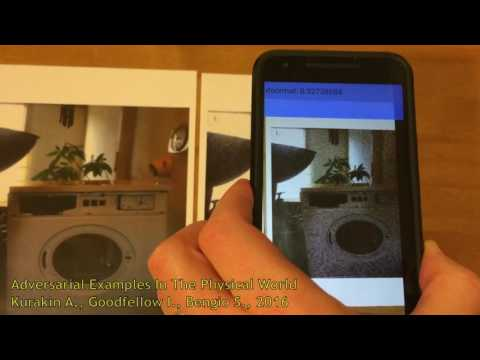

In [12]:
YouTubeVideo("zQ_uMenoBCk")

#### Adversarial white-box attacks: explanation

Since the loss function and parameters (weights) of the network are known, we can engineer a impercertible perturbation that, added to the input, causes the loss value to go up.

Formally, let $\theta$ be the parameters of a model, $x$ its inputs, $y$ the targets associated with $x$ and $\mathcal{J}(\theta, x, y)$ the loss function used to train the neural network.

$\nabla_{x}\mathcal{J}(\theta, x, y)$ is the gradient of the loss function w.r.t. the inputs $x$. It represents how much the error changes when a small modification to $x$ is made.

$\eta = \epsilon \cdot \mathcal{sign}(\nabla_{x}\mathcal{J}(\theta, x, y))$ is the perturbation that causes an increase in the loss value while being small enough to be hard to detect.

#### Adversarial black-box attacks

In most situations, access to the model's internals is impossible. Researchers have nonetheless found a way to try to trick the model by:

1. training a *substitute model* by observing the outputs of the original model on a synthetic dataset.
1. using the substitute model to generate adversarial examples, using a white-box technique.

The original model will very often misclassify examples generated this way.

#### Adversarial training

Training a model on a mixture of adversarial and clean examples increases its robustness against adversarial attacks, even acting a a form of regularization to fight overfitting.

[![Adversarial training curves](images/adversarial_training_curves.png)](http://cs231n.stanford.edu/)

### Additional resources

- Szegedy, Christian, Wojciech Zaremba, Ilya Sutskever, Joan Bruna, Dumitru Erhan, Ian Goodfellow, and Rob Fergus. “Intriguing Properties of Neural Networks.” ArXiv:1312.6199 [Cs], February 19, 2014. http://arxiv.org/abs/1312.6199
- Goodfellow, Ian J., Jonathon Shlens, and Christian Szegedy. “Explaining and Harnessing Adversarial Examples.” ArXiv:1412.6572 [Cs, Stat], March 20, 2015. http://arxiv.org/abs/1412.6572
- Papernot, Nicolas, Patrick McDaniel, Ian Goodfellow, Somesh Jha, Z. Berkay Celik, and Ananthram Swami. “Practical Black-Box Attacks against Machine Learning.” ArXiv:1602.02697 [Cs], March 19, 2017. http://arxiv.org/abs/1602.02697
- [Lecture 16 | Adversarial Examples and Adversarial Training](https://www.youtube.com/watch?v=CIfsB_EYsVI) (YouTube)

## Ethics

### Definition

A branch of philosophy, **ethics** seeks to resolve questions of human morality by defining concepts such as good and evil, right and wrong, virtue and vice, justice and crime.

> "Ethics is the capacity to think critically about moral values and direct our actions in terms of such values." (Larry Churchill)

([Source](https://en.wikipedia.org/wiki/Ethics))

### The social and societal implications of AI

AI-driven (and, in particular, ML-driven) technologies are steadily reshaping numerous aspects of people's lives, leading to many social and societal implications:

- Job market transformation.
- Human/machine interactions.
- Trust and acceptability.
- Legal aspects.
- Fairness.
- etc.

This calls for a reflection about the ethics of AI.

#### Example of moral dilemna: what should the self-driving car do?

[![Moral Machine](images/moral_machine.png)](https://www.moralmachine.net/)

### Culture-dependant approaches

**Culture** can be defined as a dynamic and ever-changing repertoire of shared understandings, inseparable from history, politics, and economics.

Views regarding the relationship between society and technology vary greatly around the globe. Terms like "fairness" and "privacy" can mean different things in different places.

Ethics and culture must be considered together.

#### Case study #1: facial recognition systems

In Western countries, a growing number of towns and even states are banning the use of such systems, mainly for privacy reasons.

On the contrary, facial recognition is being heavily deployed in countries such as China or Brazil.

[![Facial recognition in a Nanjing school, China](images/china_school_facial_reco.gif)](https://twitter.com/mbrennanchina/status/1203687857849716736)

#### Case study #2: social credit system

The "social credit system" is a blanket term for a series of initiatives meant to strengthen the enforcement of pre-existing laws in China.

Although not as pervasive as Westerners believe it to be, these tools nonetheless offer a growing set of population monitoring and evaluation metrics.

For now, it is  perceived as globally beneficial to society by the Chinese population.

#### Case study #3: data protection

The **General Data Protection Regulation (GDPR)** is an EU-wide law that protects Europeans with regards to the processing of their personal data, 

For the moment, it has no equivalent in other juridictions.

Americans, for example, merely talk about "privacy" instead of "data protection", revealing distinct cultural conceptions and concerns about the relationship between individuals, governments, and corporations.

([Source](https://en.wikipedia.org/wiki/General_Data_Protection_Regulation))

### Global initiatives

#### Montreal declaration for a responsible development of AI

This [declaration](https://www.montrealdeclaration-responsibleai.com/the-declaration) has three main objectives:

1. Develop an ethical framework for the development and deployment of AI;
1. Guide the digital transition so everyone beneﬁts from this technological revolution;
1. Open a national and international forum for discussion to collectively achieve equitable, inclusive, and ecologically sustainable AI development.

#### Asilomar AI Principles

- A set of 23 guidelines for the development of beneficial AI and to make beneficial AI development easier.
- Supported by many prominent AI scientists (LeCun, Bengio, Hinton, Hassabis, etc.).

[![Asilomar banner](images/Asilomar-AI-principles.png)](https://futureoflife.org/2017/08/11/ai-principles/)

#### European ethics guidelines

The AI High Level Expert Group provides advice to the European Commission on its Artificial Intelligence strategy.

One of its reports addresses the question of [ethics guidelines for trustworthy AI](https://digital-strategy.ec.europa.eu/en/library/ethics-guidelines-trustworthy-ai).

[![AI HLEG](images/HLEG.jpg)](https://digital-strategy.ec.europa.eu/en/policies/expert-group-ai)

### Fundamental human rights

The [Universal Declaration of Human Rights](https://www.un.org/en/about-us/universal-declaration-of-human-rights) already provides a global framework for designing responsible and beneficial AI systems.

- Article 1: "All human beings are born free and equal in dignity and rights. They are endowed with reason and conscience and should act towards one another in a spirit of brotherhood."

- Article 12: "No one shall be subjected to arbitrary interference with his privacy, family, home or correspondence, nor to attacks upon his honour and reputation. Everyone has the right to the protection of the law against such interference or attacks."

- Article 30: "Nothing in this Declaration may be interpreted as implying for any State, group or person any right to engage in any activity or to perform any act aimed at the destruction of any of the rights and freedoms set forth herein."

### Additional resources

- Hagerty, Alexa, and Igor Rubinov. “Global AI Ethics: A Review of the Social Impacts and Ethical Implications of Artificial Intelligence,” n.d., 27
- Kazim, Emre, and Adriano Soares Koshiyama. “A High-Level Overview of AI Ethics.” Patterns 2, no. 9 (September 2021): 100314. https://doi.org/10.1016/j.patter.2021.100314
